# Analítica de datos
# Examen parcial 1
# 2020-01
# <font color='red'> Daniel Galvis, A00130540 </font>

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando modelos de aprendizaje supervisado (KNN y Naïve Bayes) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID único del cliente en el banco. Variable numérica positiva. 
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Deuda: Indica la cantidad de dinero que aún adeuda el cliente correspondiente a préstamos. Valores numéricos positivos o en cero.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Valores numéricos. Estas cuentas no permiten tener saldo en rojo.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- <font color='red'>1. Limpieza de datos: Exploren los datos e identifiquen problemas e inconsistencias del dataset teniendo en cuenta el diccionario de datos y del contexto. Arreglen los problemas identificados (solo después de identificarlos todos), argumentando sus decisiones. (2.0)</font>
- <font color='red'>2. Obtengan el modelo de referencia (Baseline), interprételo y calcule su accuracy. (0.3)</font>

## Modelamiento con K-NN y Naïve Bayes

#### Puntos a desarrollar:

<font color='red'>Entrene modelos de clasificación siguiendo el siguiente protocolo:</font>
- <font color='red'>3. Haga un holdout estratificado 70% training - 30% test sobre el dataset solo incluyendo las variables numéricas. No olvide normalizar los datos correctamente (0.3)</font>
- <font color='red'>4. Sobre el training set siga un protocolo de 5 fold cross validation para buscar los mejores valores de los parámetros de un modelo K-NN, teniendo en cuenta el Kappa. Evaluar un modelo global, otro para estudiantes y otro para no estudiantes. Concluir (0.9)</font>
- <font color='red'>5. Sobre el training set siga un protocolo de 5 fold cross validation para buscar los mejores valores de los parámetros de un modelo NaïveBayes, tenga en cuenta utilizar las distribuciones adecuadas a los tipos de variables predictivas. Repetir el proceso de los tres modelos. (0.9) Si quisieramos incluir el efecto de la variable Estudiante en el modelo entrenado con las variables numéricas sin utilizar sklearn, que tenemos que hacer (0.2)</font>
- <font color='red'>6. Sobre el test set compare los dos modelos (K-NN y NB) y escoja el mejor según el Kappa (0.4)</font>

# Desarrollo de los puntos

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
#...
#...
#...

In [2]:
df = pd.read_csv('creditos_examen.csv',';')

...

...

# 1. Limpieza de datos

## Identificación de problemas de datos.

Primero, veremos la información general sobre los datos (su forma, primeros y últimos datos, descripción e información)

In [3]:
df.shape

(10002, 5)

In [4]:
df.head()

,ID,PudoPagar,Estudiante,Deuda,Cuenta
0,1,0,No,4436163,3647632
1,2,0,Si,1210613,4085902
2,3,0,No,3176714,5367746
3,4,0,No,3570449,2646253
4,5,0,No,3846350,3928279


In [5]:
df.tail()

,ID,PudoPagar,Estudiante,Deuda,Cuenta
9997,9996,0,No,5299238,3557775
9998,9997,0,No,1966072,3789815
9999,9998,0,No,5863616,4227060
10000,9999,0,No,3666911,7845045
10001,10000,0,Si,1686295,1004611


Desde este punto podemos darnos cuenta que aparentemente hay un problema con los ids, ya que hay 10002 filas, pero el contador de id solo llega hasta 10000

In [6]:
df.describe(include='all')

,ID,PudoPagar,Estudiante,Deuda,Cuenta
count,10002.000000,10002.000000,9998,1.000200e+04,1.000200e+04
unique,NaN,NaN,4,NaN,NaN
top,NaN,NaN,No,NaN,NaN
freq,NaN,NaN,7050,NaN,NaN
mean,5000.379324,0.033293,NaN,3.036624e+06,1.545269e+07
std,2887.127481,0.179410,NaN,7.028235e+07,1.019546e+09
min,-3.000000,0.000000,NaN,-4.288864e+09,-2.247063e+07
25%,2500.250000,0.000000,NaN,1.823657e+06,2.408188e+06
50%,5000.500000,0.000000,NaN,3.209805e+06,4.118185e+06
75%,7500.750000,0.000000,NaN,4.281461e+06,5.833152e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 5 columns):
ID            10002 non-null int64
PudoPagar     10002 non-null int64
Estudiante    9998 non-null object
Deuda         10002 non-null int64
Cuenta        10002 non-null int64
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


A partir del resumen de los datos, se encuentran más problemas: estudiante tiene valores nulos, estudiante tiene 4 valores únicos (cuando solo deberían ser 2), "PudoPagar" está representada como un entero, cuando debería de ser categórica (binaria), id tiene valores negativos (que seguramente explica el problema que se mencionó anteriormente), y tanto deuda como cuenta tiene valores negativos (cuando en ninguno se permiten).

Con estudiante, veamos cuales son los 4 valores que está tomando:

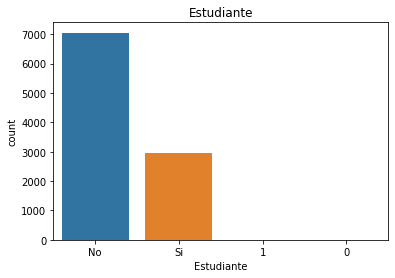

In [8]:
fig, ax = plt.subplots()
sns.countplot(x=df.columns[2], data=df)
plt.title(df.columns[2])

plt.show()

In [9]:
df[(df['Estudiante'] == '1') | (df['Estudiante'] == '0')]

,ID,PudoPagar,Estudiante,Deuda,Cuenta
4691,4692,0,1,1370247,1158854
6485,6486,0,1,2432606,4800570
6930,6930,0,0,4958587,1493598
7994,7994,0,0,3467996,1855909
7995,7995,0,1,1920050,7190277
8610,8609,0,0,4250341,4646486


Vemos que hay 3 valores en los que estudiante tiene como valor "1" y tres en los que tiene valor "0". Todo el resto tiene como valor "Si" o "No"

Ahora, se harán boxplots sobre las variables numéricas para encontrar valores atípicos

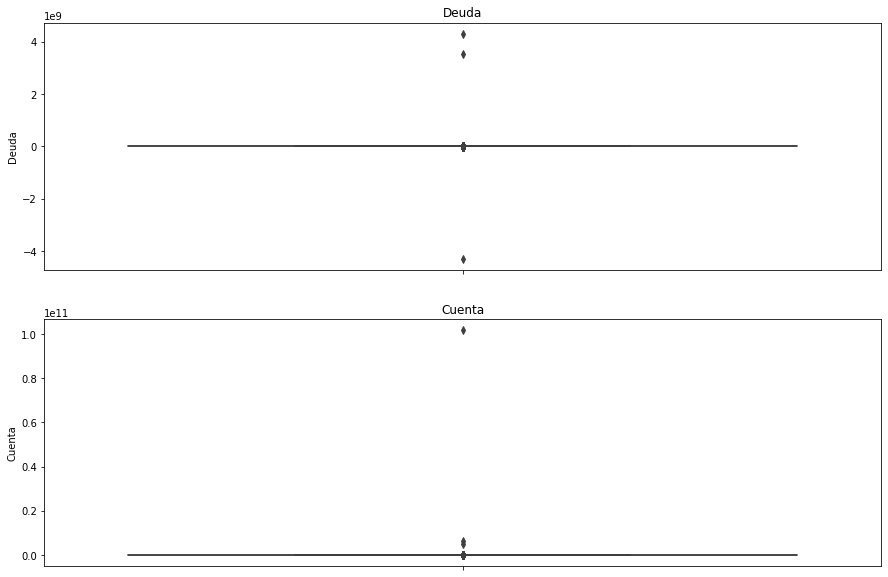

In [10]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in df.columns[3:]:
    ax = fig.add_subplot(2, 1, i) #Defino una tabla de 2 filas por 1 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=df)
    plt.title(var_num)
    i+=1

Son claros los 2 valores atípicos en la variable deuda (El negativo ya es considerado inváido), y el atípico en Cuenta (Posiblemente 2, nos daremos cuenta al borrar el más grande).

Algo más a verificar, es que la columna id no tenga valores repetidos, ya que el id es único:

In [11]:
df['ID'].is_unique

False

Vemos que el método anterior retorna False, lo que quiere decir que hay ID's repetidos, cuando se supone que es único

In [12]:
df[df.duplicated()]

,ID,PudoPagar,Estudiante,Deuda,Cuenta
1423,1424,0,No,3640304,7574816
8143,8142,0,Si,2428223,1136586


Vemos que hay 2 registros que se repiten (Los que tienen id 1424 y 8142)

In [13]:
df[df.duplicated(subset='ID')]

,ID,PudoPagar,Estudiante,Deuda,Cuenta
499,500,0,Si,1644010,4827937
500,500,0,Si,2048960,9342700
1423,1424,0,No,3640304,7574816
8143,8142,0,Si,2428223,1136586


Por otro lado, aparte de los 2 registros mencionados arriba, hay 2 registros con 'ID' 500, pero con valores diferentes para Deuda y Cuenta

Resumen de los problemas encontrados:
- Se encontro que hay ids con valores negativos. Para solucionar este problema se decidió que eliminar la columna id, ya que considero que no es necesaria para hacer la predicción, y que incluso dejarla puede hacer ruido que perjudique las prediccionnes. El id no aporta nada a saber si alguien va a poder pagar el crédito sin problemas según sus caraterísticas, ya que es simplemente un identificador de personas.
- Se encontro que estudiante tiene 4 valores nulos. Para solucionar este problema se decidió que se eliminaran estos registros, ya que considero que no se puede inferir que significa una variable nula, e igualmente son solo 4 datos los que se borrarán, no debería de ser un problema.
- Se encontro que estudiante tiene 4 tipo de valores, cuando solo deberían ser 2 ("Si" o "No"). Para solucionar este problema se decidió que cuando tenga valor '1' será considerado como "Sí", y cuando tenga valor '0' será considerado como "No", ya que considero que es una convención que, cuando se trata de variables booleanas, el 1 sea tratado como True y el 0 como False, así que muy seguramente esto es lo que significan estos valores.
- Se encontro que PudoPagar es de tipo entero, cuando debería de ser binario. Para solucionar este problema se decidió que se convertirá a tipo binario, ya que considero que se leyó como entero debido a que sus valores toman '1' o '0', pero lo que en verdad representan es 'true' y 'false'
- Se encontro que la variable deuda tiene valores negativos. Para solucionar este problema se decidió que se tomará su valor absoluto, ya que considero que lo más probable es que haya sido un error de tipeo el que lo volvió negativo, en caso dado de que el valor absoluto tenga sentido
- Se encontro que la variable cuenta tiene valores negativos. Para solucionar este problema se decidió que lo mismo que con deuda, por la misma razón
- Se encontro que la variable deuda tiene valores atípicos. Para solucionar este problema se decidió que se borrarán los registros donde aparecen estos valores atípicos, ya que considero que son muy pocos pero pueden dañar el entrenamiento de los modelos
- Se encontro que la variable Cuenta tiene valores atípicos. Para solucionar este problema se decidió que borrarán los registros donde aparecen estos valores atípicos, ya que considero que son muy pocos pero pueden dañar el entrenamiento de los modelos
- Se encontro que la variable ID tiene valores repetidos, cuando debería de ser único, aunque otras columnas sean diferentes. Para solucionar este problema se decidió que se ignorará la columna ID, ya que esta columna no ayuda a hacer la predicción, seguramente esta duplicación del id fue algún error de tipeo o algo parecido.
- Se encontro que hay filas duplicadas (incluyendo el id). Para solucionar este problema se decidió que se eliminarán los registros duplicados, ya que considero que lo más seguro es que estén ahí por errar, y dejar estos registros duplicados puede llegar a sesgar el modelo. De igual forma, solamente son 2 registros.

## Corrección de problemas de datos.

In [14]:
del df['ID']

In [15]:
df = df.dropna()

In [16]:
df['PudoPagar'] = df['PudoPagar'].astype('bool')

In [17]:
df['Estudiante'] = df['Estudiante'].replace('0','No')
df['Estudiante'] = df['Estudiante'].replace('1', 'Si')

In [18]:
df['Deuda'] = df['Deuda'].abs()
df ['Cuenta'] = df['Cuenta'].abs()

In [19]:
df = df[(df['Deuda'] < 2000000000)]
df = df[(df['Cuenta'] < 100000000000)]

In [20]:
df = df.drop_duplicates()

Acá ya se realizó la limpieza que se especificó en el punto anterior, se volverá a hacer un repaso sobre los datos para verificar que todo esté bien:

In [21]:
df.head()

,PudoPagar,Estudiante,Deuda,Cuenta
0,False,No,4436163,3647632
1,False,Si,1210613,4085902
2,False,No,3176714,5367746
3,False,No,3570449,2646253
4,False,No,3846350,3928279


In [22]:
df.tail()

,PudoPagar,Estudiante,Deuda,Cuenta
9997,False,No,5299238,3557775
9998,False,No,1966072,3789815
9999,False,No,5863616,4227060
10000,False,No,3666911,7845045
10001,False,Si,1686295,1004611


In [23]:
df.describe(include="all")

,PudoPagar,Estudiante,Deuda,Cuenta
count,9992,9992,9.992000e+03,9.992000e+03
unique,2,2,NaN,NaN
top,False,No,NaN,NaN
freq,9660,7048,NaN,NaN
mean,NaN,NaN,3.351442e+06,5.294929e+06
std,NaN,NaN,1.334019e+06,7.932287e+07
min,NaN,NaN,7.719700e+04,0.000000e+00
25%,NaN,NaN,2.132927e+06,2.409284e+06
50%,NaN,NaN,3.454928e+06,4.118502e+06
75%,NaN,NaN,4.381068e+06,5.833031e+06


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 10001
Data columns (total 4 columns):
PudoPagar     9992 non-null bool
Estudiante    9992 non-null object
Deuda         9992 non-null int64
Cuenta        9992 non-null int64
dtypes: bool(1), int64(2), object(1)
memory usage: 322.0+ KB


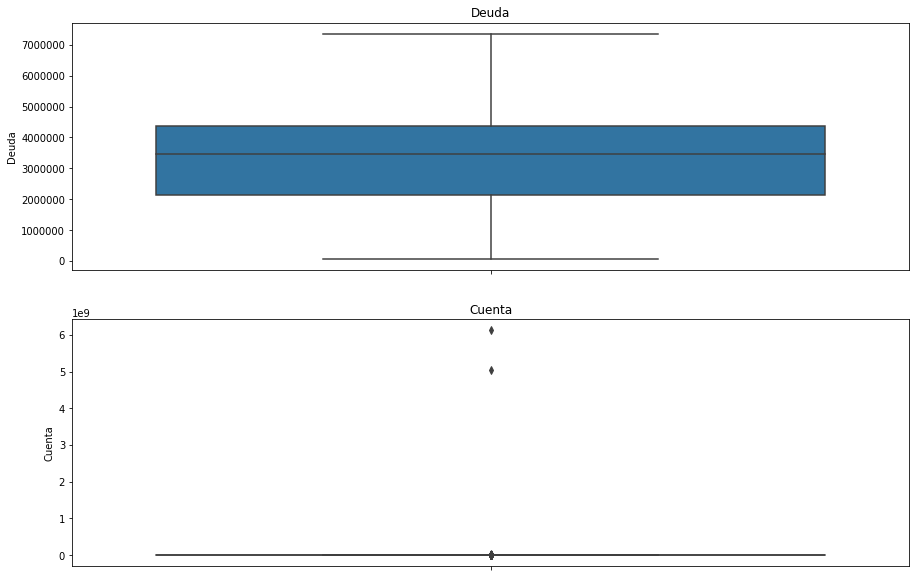

In [25]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in df.columns[2:]:
    ax = fig.add_subplot(2, 1, i) #Defino una tabla de 2 filas por 1 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=df)
    plt.title(var_num)
    i+=1

Cuenta sigue teniendo valores atípicos, así que se eliminarán esos registros:

In [26]:
df = df[(df['Cuenta'] < 4000000000)]

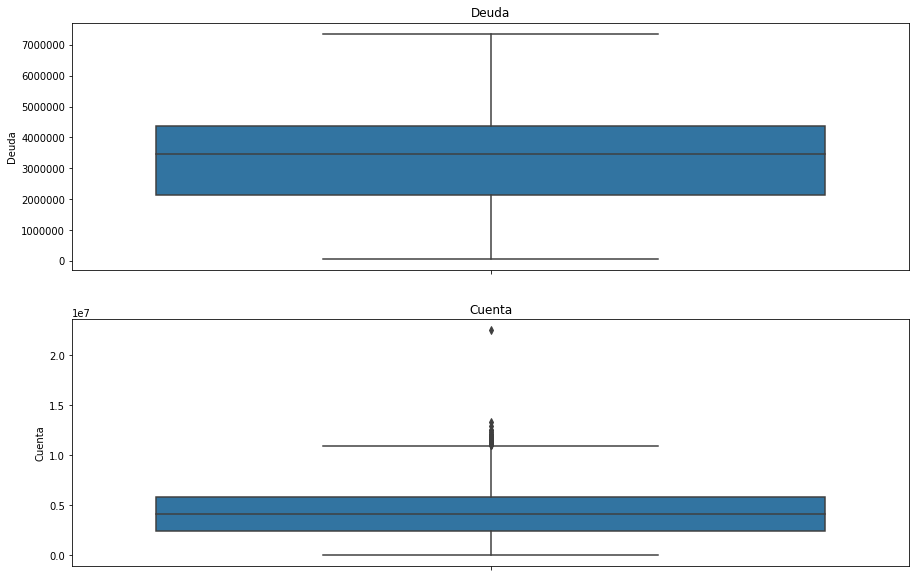

In [27]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in df.columns[2:]:
    ax = fig.add_subplot(2, 1, i) #Defino una tabla de 2 filas por 1 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=df)
    plt.title(var_num)
    i+=1

Se eliminará el último punto, ya que sigue viendose lejano:

In [28]:
df = df[(df['Cuenta'] < 20000000)]

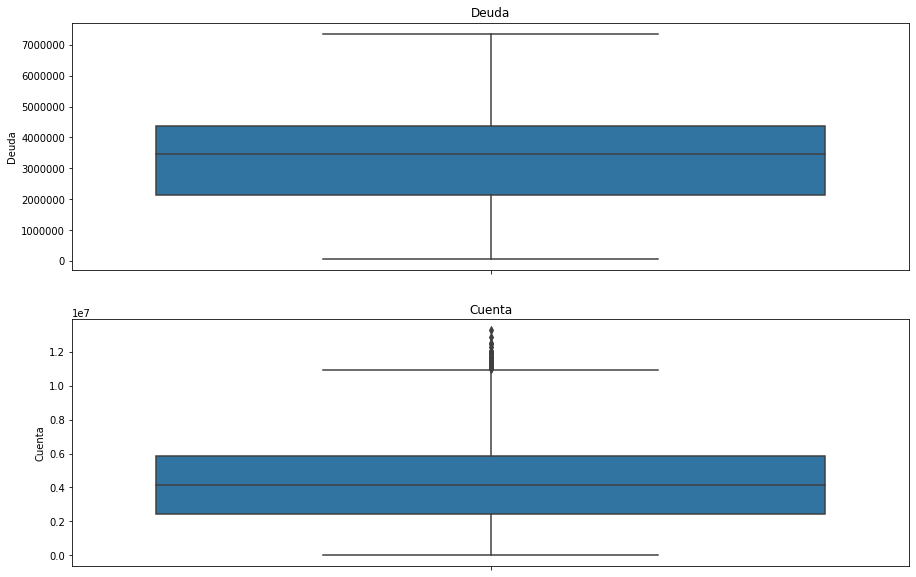

In [29]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in df.columns[2:]:
    ax = fig.add_subplot(2, 1, i) #Defino una tabla de 2 filas por 1 columnas, agrego el i-ésimo plot
    sns.boxplot(y=var_num, data=df)
    plt.title(var_num)
    i+=1

Aún siguen saliendo valores en "Cuenta" que parecen atípicos, pero no están muy lejos del límite y son varios, así que los dejaremos

In [30]:
df[df.duplicated()]

,PudoPagar,Estudiante,Deuda,Cuenta


In [31]:
df.shape

(9989, 4)

Tenemos que el dataset después de limpieza cuenta con 9989 registros.

# 2. Modelo de referencia (Baseline)

In [32]:
df.describe(include='all')

,PudoPagar,Estudiante,Deuda,Cuenta
count,9989,9989,9.989000e+03,9.989000e+03
unique,2,2,NaN,NaN
top,False,No,NaN,NaN
freq,9657,7045,NaN,NaN
mean,NaN,NaN,3.350911e+06,4.176538e+06
std,NaN,NaN,1.333857e+06,2.417627e+06
min,NaN,NaN,7.719700e+04,0.000000e+00
25%,NaN,NaN,2.132316e+06,2.409205e+06
50%,NaN,NaN,3.454612e+06,4.118049e+06
75%,NaN,NaN,4.380263e+06,5.830501e+06


El valor que más se repite en nuestra variable a predecir es False, con una frecuencia de 9657 / 9989

Es decir, si se usara el baseline, prediciría todos los datos como que no podrán pagar el credito a tiempo (es decir, como False).

In [33]:
 print('El accuracy del baseline sería de', df['PudoPagar'].value_counts().max()/df.shape[0])

El accuracy del baseline sería de 0.9667634397837621


# 3. Holdout sobre el dataset

### Holdout global

In [34]:
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.preprocessing import StandardScaler
stdsc_global = StandardScaler()

In [35]:
x_global = df.iloc[:,2:].values
y_global = df.iloc[:,0].values

In [36]:
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(x_global, y_global, test_size=0.3, random_state=12345, stratify=y_global)
X_train_std_global = stdsc_global.fit_transform(X_train_global)
X_test_std_global = stdsc_global.transform(X_test_global)

### Holdout Estudiantes

In [37]:
stdsc_estud = StandardScaler()

In [38]:
x_estud = df[(df['Estudiante'] == 'Si')].iloc[:,2:].values
y_estud = df[(df['Estudiante'] == 'Si')].iloc[:,0].values 

In [39]:
X_train_estud, X_test_estud, y_train_estud, y_test_estud = train_test_split(x_estud, y_estud, test_size=0.3, random_state=12345, stratify=y_estud)
X_train_std_estud = stdsc_estud.fit_transform(X_train_estud)
X_test_std_estud = stdsc_estud.transform(X_test_estud)

### Holdout No Estudiantes

In [40]:
stdsc_no_estud = StandardScaler()

In [41]:
x_no_estud = df[(df['Estudiante'] == 'No')].iloc[:,2:].values
y_no_estud = df[(df['Estudiante'] == 'No')].iloc[:,0].values 

In [42]:
X_train_no_estud, X_test_no_estud, y_train_no_estud, y_test_no_estud = train_test_split(x_no_estud, y_no_estud, test_size=0.3, random_state=12345, stratify=y_no_estud)
X_train_std_no_estud = stdsc_no_estud.fit_transform(X_train_no_estud)
X_test_std_no_estud = stdsc_no_estud.transform(X_test_no_estud)

# 4. KNN

### KNN Global

In [43]:
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import StratifiedKFold #Iteradores de C-V

import warnings
warnings.filterwarnings('ignore')

In [44]:
ks=[1,3,5,7,8,9,11,12,13,14,15]
max_k_global = 0
max_kappa_global = -2
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_global, y_train_global):
        knn.fit(X_train_std_global[indices_train], y_train_global[indices_train])
        y_pred = knn.predict(X_train_std_global[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_global[indices_test], y_pred))
    kappa = np.asarray(acc_test_vec).mean()
    if (kappa > max_kappa_global):
        max_k_global = k
        max_kappa_global = kappa
    print("Con k =", k, " el kappa promedio es:", kappa)
    
print("El k seleccionado, basandonos en el Kappa, es", max_k_global, "que genera un kappa promedio de",max_kappa_global)

Con k = 1  el kappa promedio es: 0.2829849388623419
Con k = 3  el kappa promedio es: 0.3463883012343942
Con k = 5  el kappa promedio es: 0.3908548574060453
Con k = 7  el kappa promedio es: 0.3973104982090231
Con k = 8  el kappa promedio es: 0.38184650977117907
Con k = 9  el kappa promedio es: 0.4255211016792416
Con k = 11  el kappa promedio es: 0.416448311102951
Con k = 12  el kappa promedio es: 0.3701434142188984
Con k = 13  el kappa promedio es: 0.39293823283740015
Con k = 14  el kappa promedio es: 0.3690820505437061
Con k = 15  el kappa promedio es: 0.4036238071035256
El k seleccionado, basandonos en el Kappa, es 9 que genera un kappa promedio de 0.4255211016792416


### KNN Estudiantes

In [45]:
ks=[1,3,5,7,8,9,11,12,13,14,15]
max_k_estud = 0
max_kappa_estud = -2
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_estud, y_train_estud):
        knn.fit(X_train_std_estud[indices_train], y_train_estud[indices_train])
        y_pred = knn.predict(X_train_std_estud[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_estud[indices_test], y_pred))
    kappa = np.asarray(acc_test_vec).mean()
    if (kappa > max_kappa_estud):
        max_k_estud = k
        max_kappa_estud = kappa
    print("Con k =", k, " el kappa promedio es:", kappa)
    
print("El k seleccionado, basandonos en el Kappa, es", max_k_estud, "que genera un kappa promedio de",max_kappa_estud)

Con k = 1  el kappa promedio es: 0.3290015196525126
Con k = 3  el kappa promedio es: 0.38342968475727235
Con k = 5  el kappa promedio es: 0.40213472119230814
Con k = 7  el kappa promedio es: 0.44505059394607305
Con k = 8  el kappa promedio es: 0.4234144775943044
Con k = 9  el kappa promedio es: 0.44955199193992623
Con k = 11  el kappa promedio es: 0.465183444824099
Con k = 12  el kappa promedio es: 0.4069284486896404
Con k = 13  el kappa promedio es: 0.4431542448556873
Con k = 14  el kappa promedio es: 0.4158290232697732
Con k = 15  el kappa promedio es: 0.4344040467502195
El k seleccionado, basandonos en el Kappa, es 11 que genera un kappa promedio de 0.465183444824099


### KNN No Estudiantes

In [46]:
ks=[1,3,5,7,8,9,11,12,13,14,15]
max_k_no_estud = 0
max_kappa_no_estud = -2
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_no_estud, y_train_no_estud):
        knn.fit(X_train_std_no_estud[indices_train], y_train_no_estud[indices_train])
        y_pred = knn.predict(X_train_std_no_estud[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_no_estud[indices_test], y_pred))
    kappa = np.asarray(acc_test_vec).mean()
    if (kappa > max_kappa_no_estud):
        max_k_no_estud = k
        max_kappa_no_estud = kappa
    print("Con k =", k, " el kappa promedio es:", kappa)
    
print("El k seleccionado, basandonos en el Kappa, es", max_k_no_estud, "que genera un kappa promedio de",max_kappa_no_estud)

Con k = 1  el kappa promedio es: 0.2528068020718517
Con k = 3  el kappa promedio es: 0.38200322633654965
Con k = 5  el kappa promedio es: 0.39715446638585405
Con k = 7  el kappa promedio es: 0.39848165726298246
Con k = 8  el kappa promedio es: 0.379201170680441
Con k = 9  el kappa promedio es: 0.3996445712089894
Con k = 11  el kappa promedio es: 0.4022396160291552
Con k = 12  el kappa promedio es: 0.3522217360734123
Con k = 13  el kappa promedio es: 0.35915538916463746
Con k = 14  el kappa promedio es: 0.3475267383188946
Con k = 15  el kappa promedio es: 0.3708532357214909
El k seleccionado, basandonos en el Kappa, es 11 que genera un kappa promedio de 0.4022396160291552


# 5. Naive Bayes

### Naive Bayes global 

In [47]:
from sklearn import naive_bayes

In [48]:
smoothings=[1e-100,1e-20,1e-10,1e-9,1e-8,1e-4,1e-2,1e-1,0,1,1e2,1e4]
max_smoothing_global = 0
max_kappa_global = -2

for smoothing in smoothings:    
    gnb = naive_bayes.GaussianNB(var_smoothing=smoothing)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    modeloGNB = gnb.fit(X_train_std_global, y_train_global)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_global, y_train_global):
        gnb.fit(X_train_std_global[indices_train], y_train_global[indices_train])
        y_pred = gnb.predict(X_train_std_global[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_global[indices_test], y_pred))
    
    if (kappa > max_kappa_global):
        max_smoothing_global = smoothing
        max_kappa_global = kappa
    
    kappa = np.asarray(acc_test_vec).mean()
    print("Con var_smoothing =", smoothing, " el kappa promedio es:", kappa)
print("El smoothing seleccionado, basandonos en el Kappa, es", max_smoothing_global, "que genera un kappa promedio de",max_kappa_global)
    

Con var_smoothing = 1e-100  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 1e-20  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 1e-10  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 1e-09  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 1e-08  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 0.0001  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 0.01  el kappa promedio es: 0.38336339507376516
Con var_smoothing = 0.1  el kappa promedio es: 0.2796138258884258
Con var_smoothing = 0  el kappa promedio es: 0.39374094215399325
Con var_smoothing = 1  el kappa promedio es: 0.0
Con var_smoothing = 100.0  el kappa promedio es: 0.0
Con var_smoothing = 10000.0  el kappa promedio es: 0.0
El smoothing seleccionado, basandonos en el Kappa, es 1e-20 que genera un kappa promedio de 0.39374094215399325


### Naive Bayes Estudiantes

In [49]:
smoothings=[1e-100,1e-20,1e-10,1e-9,1e-8,1e-4,1e-2,1e-1,0,1,1e2,1e4]
max_smoothing_estud = 0
max_kappa_estud = -2

for smoothing in smoothings:    
    gnb = naive_bayes.GaussianNB(var_smoothing=smoothing)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    modeloGNB = gnb.fit(X_train_std_estud, y_train_estud)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_estud, y_train_estud):
        gnb.fit(X_train_std_estud[indices_train], y_train_estud[indices_train])
        y_pred = gnb.predict(X_train_std_estud[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_estud[indices_test], y_pred))
    
    if (kappa > max_kappa_estud):
        max_smoothing_estud = smoothing
        max_kappa_estud = kappa
    
    kappa = np.asarray(acc_test_vec).mean()
    print("Con var_smoothing =", smoothing, " el kappa promedio es:", kappa)
print("El smoothing seleccionado, basandonos en el Kappa, es", max_smoothing_estud, "que genera un kappa promedio de",max_kappa_estud)
    

Con var_smoothing = 1e-100  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 1e-20  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 1e-10  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 1e-09  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 1e-08  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 0.0001  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 0.01  el kappa promedio es: 0.36839554478430026
Con var_smoothing = 0.1  el kappa promedio es: 0.2891496963020015
Con var_smoothing = 0  el kappa promedio es: 0.39519416328215506
Con var_smoothing = 1  el kappa promedio es: 0.0
Con var_smoothing = 100.0  el kappa promedio es: 0.0
Con var_smoothing = 10000.0  el kappa promedio es: 0.0
El smoothing seleccionado, basandonos en el Kappa, es 1e-20 que genera un kappa promedio de 0.39519416328215506


### Naive Bayes No Estudiante

In [50]:
smoothings=[1e-100,1e-20,1e-10,1e-9,1e-8,1e-4,1e-2,1e-1,0,1,1e2,1e4]
max_smoothing_no_estud = 0
max_kappa_no_estud = -2

for smoothing in smoothings:    
    gnb = naive_bayes.GaussianNB(var_smoothing=smoothing)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
    modeloGNB = gnb.fit(X_train_std_no_estud, y_train_no_estud)
    acc_test_vec=[]
    for indices_train, indices_test in kf.split(X_train_std_no_estud, y_train_no_estud):
        gnb.fit(X_train_std_no_estud[indices_train], y_train_no_estud[indices_train])
        y_pred = gnb.predict(X_train_std_no_estud[indices_test])
        acc_test_vec.append(metrics.cohen_kappa_score(y_train_no_estud[indices_test], y_pred))
    
    if (kappa > max_kappa_no_estud):
        max_smoothing_no_estud = smoothing
        max_kappa_no_estud = kappa
    
    kappa = np.asarray(acc_test_vec).mean()
    print("Con var_smoothing =", smoothing, " el kappa promedio es:", kappa)
print("El smoothing seleccionado, basandonos en el Kappa, es", max_smoothing_no_estud, "que genera un kappa promedio de",max_kappa_no_estud)
    

Con var_smoothing = 1e-100  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 1e-20  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 1e-10  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 1e-09  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 1e-08  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 0.0001  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 0.01  el kappa promedio es: 0.3502917919617904
Con var_smoothing = 0.1  el kappa promedio es: 0.2211935512512894
Con var_smoothing = 0  el kappa promedio es: 0.35895236151920507
Con var_smoothing = 1  el kappa promedio es: 0.0
Con var_smoothing = 100.0  el kappa promedio es: 0.0
Con var_smoothing = 10000.0  el kappa promedio es: 0.0
El smoothing seleccionado, basandonos en el Kappa, es 1e-20 que genera un kappa promedio de 0.35895236151920507


#### Si quisieramos incluir el efecto de la variable Estudiante en el modelo entrenado con las variables numéricas sin utilizar sklearn, lo que tendríamos que hacer es tratar la variable "Estudiante" como un valor entero, en donde a los que tienen como valor "Si" se les asigna el valor 1, mientras que a los que valen "No", se les asigna un 0

# 6. Comparación y conclusiones

### Comparación global

In [51]:
knn = neighbors.KNeighborsClassifier(n_neighbors=max_k_global)
knn.fit(X_train_std_global, y_train_global)
y_pred = knn.predict(X_test_std_global)
knn_kappa_global = metrics.cohen_kappa_score(y_test_global, y_pred)
knn_kappa_global

0.3737742358715196

In [52]:
gnb = naive_bayes.GaussianNB(var_smoothing=max_smoothing_global)
gnb.fit(X_train_std_global, y_train_global)
y_pred = gnb.predict(X_test_std_global)
bayes_kappa_global = metrics.cohen_kappa_score(y_test_global, y_pred)
bayes_kappa_global

0.37076864787379615

#### Lo que se puede concluir cuando se hace una predicción global, es que, aparentemente, el Kappa es más alto para el KNN que para el Naive-Bayes, por lo que se recomendará utilizar el modelo de knn con k = 9

### Comparación estudiantes

In [53]:
knn = neighbors.KNeighborsClassifier(n_neighbors=max_k_estud)
knn.fit(X_train_std_estud, y_train_estud)
y_pred = knn.predict(X_test_std_estud)
knn_kappa_global = metrics.cohen_kappa_score(y_test_estud, y_pred)
knn_kappa_global

0.4400948022229487

In [54]:
gnb = naive_bayes.GaussianNB(var_smoothing=max_smoothing_estud)
gnb.fit(X_train_std_estud, y_train_estud)
y_pred = gnb.predict(X_test_std_estud)
bayes_kappa_global = metrics.cohen_kappa_score(y_test_estud, y_pred)
bayes_kappa_global

0.4005075253762689

#### Lo que se puede concluir cuando se hace una predicción entre los estudiantes, es que, aparentemente, el Kappa es más alto para el KNN que para el Naive-Bayes, por lo que se recomendará utilizar el modelo de knn con k = 11

### Comparación No Estudiantes

In [55]:
knn = neighbors.KNeighborsClassifier(n_neighbors=max_k_no_estud)
knn.fit(X_train_std_no_estud, y_train_no_estud)
y_pred = knn.predict(X_test_std_no_estud)
knn_kappa_global = metrics.cohen_kappa_score(y_test_no_estud, y_pred)
knn_kappa_global

0.3840913665787328

In [56]:
gnb = naive_bayes.GaussianNB(var_smoothing=max_smoothing_no_estud)
gnb.fit(X_train_std_no_estud, y_train_no_estud)
y_pred = gnb.predict(X_test_std_no_estud)
bayes_kappa_global = metrics.cohen_kappa_score(y_test_no_estud, y_pred)
bayes_kappa_global

0.36641445843088016

#### Lo que se puede concluir cuando se hace una predicción entre los no estudiantes estudiantes, es que, aparentemente, el Kappa es más alto para el KNN que para el Naive-Bayes, por lo que se recomendará utilizar el modelo de knn con k = 11

### Conclusiones Generales

#### De forma general, se concluye que, para los 3 casos evaluados, el modelo de KNN tiene un mejor coeficiente Kappa que el modelo de Naive-Bayes. Es decir, knn genera mejores predicciones en comparación al baseline de lo que lo hace el Naive-Bayes para este caso en específico

#### También, se puede evidenciar que los coeficientes kappas cuando se evalúan estudiantes y no estudiantes, son mejores que el kappa de el modelo general (sobretodo en el caso de estudiantes), por lo que se puede concluir que lo mejor es tener estos dos modelos separados y, cuando se quiera predecir si un cliente va a pagar o no su prestamo a tiempo, en caso que sea estudiante se evaluará en uno de los modelos (el que fue entrenado con estudiantes), y en caso que no en el otro (que fue entrenado por no estudiantes)